## Cargar Dataframes


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.functions import (
    col, lit, expr, when, split, trim, upper, substring, round,
    count, avg, sum, max, min,
    datediff, current_date,
    array, explode, struct, regexp_replace
)
import re

In [2]:
# ==============================
# 1. Inicializar Spark Session
# ==============================
spark = SparkSession.builder \
    .appName("HDFS_NiFi_Data_Cleaning") \
    .master("spark://spark-master:7077") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") \
    .config("spark.executor.memory", "1g") \
    .config("spark.executor.cores", "2") \
    .config("spark.cores.max", "4") \
    .config("spark.driver.memory", "1g") \
    .config("spark.driver.host", "jupyter") \
    .config("spark.driver.bindAddress", "0.0.0.0") \
    .getOrCreate()

print("Sesión creada correctamente")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/24 22:09:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/24 22:09:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Sesión creada correctamente


In [3]:
# ==============================
# 2. Paths en HDFS
# ==============================
hdfs_base_path = "hdfs://namenode:9000/user/nifi/"

# --- CSVs ---
hdfs_path_maestra = hdfs_base_path + "maestra.csv"
hdfs_path_zona = hdfs_base_path + "bd_zona.csv"
hdfs_path_json = hdfs_base_path + "datos.json"
hdfs_path_val_prod = hdfs_base_path + "Valores-Venta_Producto.csv"
hdfs_path_uni_prod = hdfs_base_path + "Unidades-Venta_Producto.csv"
hdfs_path_val_fam = hdfs_base_path + "Valores-Venta_Familia.csv"
hdfs_path_uni_fam = hdfs_base_path + "Unidades-Venta_Familia.csv"

In [4]:
# ===============================================
# 2. Carga de Datos en DataFrames de Spark
# ===============================================

# Opción de codificación para tildes y ñ
encoding_python = "UTF-8"

print("--- 1. Cargando Archivos Maestros (Separador ';') ---")
# Primer CSV (Maestra)
print("--- CSV Maestra ---")
df_maestra = spark.read.option("encoding", encoding_python) \
                       .csv(hdfs_path_maestra, header=True, inferSchema=True, sep=";")
df_maestra.show()

# Segundo CSV (Zona)
print("--- CSV Zona ---")
df_zona = spark.read.option("encoding", encoding_python) \
                    .csv(hdfs_path_zona, header=True, inferSchema=True, sep=";")
df_zona.show()


print("--- 2. Cargando JSON de Base de Datos ---")
print("--- Json Zona ---")
df_datos_zona_json = spark.read.json(hdfs_path_json)
df_datos_zona_json.show()


print("--- 3. Cargando CSVs de Ventas (Separador ',') ---")

# Valores Producto
print("--- CSV Valores Producto ---")
df_valores_producto = spark.read.option("encoding", encoding_python) \
                            .csv(hdfs_path_val_prod, header=True, inferSchema=True, sep=",")
df_valores_producto.show()

# Unidades Producto
print("--- CSV Unidades Producto ---")
df_unidades_producto = spark.read.option("encoding", encoding_python) \
                             .csv(hdfs_path_uni_prod, header=True, inferSchema=True, sep=",")
df_unidades_producto.show()

# Valores Familia
print("--- CSV Valores Familia ---")
df_valores_familia = spark.read.option("encoding", encoding_python) \
                           .csv(hdfs_path_val_fam, header=True, inferSchema=True, sep=",")
df_valores_familia.show()

# Unidades Familia
print("--- CSV Unidades Familia ---")
df_unidades_familia = spark.read.option("encoding", encoding_python) \
                            .csv(hdfs_path_uni_fam, header=True, inferSchema=True, sep=",")
df_unidades_familia.show()

print("--- ✅ Carga completada. Los 6 DataFrames estan listos. ---")

--- 1. Cargando Archivos Maestros (Separador ';') ---
--- CSV Maestra ---


+-----------+------------------+--------------------+
|   Producto|Numero de articulo|         Descripcion|
+-----------+------------------+--------------------+
|LAGRICEL PF|             41582|LAGRICEL OFTENO L...|
| ELIPTIC PF|             41561|ELIPTIC OFTENO 5M...|
|   LAGRICEL|             40515|LAGRICEL OFTENO 0...|
|FLUMETOL NF|             40513|FLUMETOL NF OFTEN...|
| TRAZIDEX O|             40341|TRAZIDEX OFTENO 5...|
| TRAZIDEX U|             40342|TRAZIDEX UNGENA 3...|
|  SOPHIPREN|             40338|SOPHIPREN OFTENO ...|
|       GAAP|             40498|    GAAP OFTENO 3 ML|
|   AQUADRAN|             41945|        AQUADRAN 10G|
|    GAAP PF|             41567|GAAP OFTENO LIBRE...|
|   ZEBESTEN|             41604|   ZEBESTEN 5ML PERU|
|     LANDAX|             41804|          LANDAX 5ML|
|     ELAR-B|             42098|         ELAR-B 5 ML|
|   DUSTALOX|             41121|        DUSTALOX 5ML|
|    ELIPTIC|             41076|  ELIPTIC OFTENO 5ML|
|     AGGLAD|             40

25/11/24 22:09:29 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------+-----------+------------------+------------------+------------------+---------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+-------------------+-------------+------------------+------------------+---------+-----------------+------------------+------------------+-------------+--------------+------------------+------------------+----------+----------------+------------------+------------------+------------+----------------+------------------+------------------+------------+------------------+------------------+------------------+------------------+
|       Zona|   Producto|     Enero 

+-----------+-----------+-------------+-----------+------------+---------+---------------+------------------+--------------+------------------+-------------+------------------+------------+-------------------+-------------+------------------+------------+-------------------+------------+------------------+-----------+--------------------+------------+------------------+-----------+--------------------+------------+------------------+-----------+-------------------+-------------+------------------+------------+---------+-----------------+------------------+----------------+-------------+--------------+------------------+-------------+----------+----------------+------------------+---------------+------------+----------------+------------------+---------------+------------+--------------+------------------+-------------+------------------+
|       Zona|   Producto|Enero _Venta |Enero _TGT |Enero _PY 24|Enero _% |Febrero _Venta |     Febrero _TGT |Febrero _PY 24|       Febrero _% |Marzo _

### Exploración de datos

In [5]:
df_maestra.printSchema()
df_maestra.show(truncate=False)

root
 |-- Producto: string (nullable = true)
 |-- Numero de articulo: integer (nullable = true)
 |-- Descripcion: string (nullable = true)

+-----------+------------------+-------------------------------------------------+
|Producto   |Numero de articulo|Descripcion                                      |
+-----------+------------------+-------------------------------------------------+
|LAGRICEL PF|41582             |LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML|
|ELIPTIC PF |41561             |ELIPTIC OFTENO 5ML PF PERU                       |
|LAGRICEL   |40515             |LAGRICEL OFTENO 0.5 ML                           |
|FLUMETOL NF|40513             |FLUMETOL NF OFTENO 5ML                           |
|TRAZIDEX O |40341             |TRAZIDEX OFTENO 5 ML.                            |
|TRAZIDEX U |40342             |TRAZIDEX UNGENA 3.5 G                            |
|SOPHIPREN  |40338             |SOPHIPREN OFTENO 5 ML                            |
|GAAP       |40498            

In [6]:
df_zona.printSchema()
df_zona.show(truncate=False)

root
 |-- Vendedor: string (nullable = true)
 |-- Nombre Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- MES NUM: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- 2025: string (nullable = true)
 |-- CANTIDAD: string (nullable = true)

+-----------+-----------------------------------------------------------------+-----------+-------+---+-------+--------+
|Vendedor   |Nombre Cliente                                                   |Producto   |MES NUM|Mes|2025   |CANTIDAD|
+-----------+-----------------------------------------------------------------+-----------+-------+---+-------+--------+
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |AGGLAD     |1      |ENE|0      |0       |
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |FLUMETOL NF|1      |ENE|0      |0       |
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |GAAP       |1      |ENE|0      |0

In [7]:
df_datos_zona_json.printSchema()
df_datos_zona_json.show(truncate=False)

root
 |-- created_at: string (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- region: string (nullable = true)
 |-- zone_code: string (nullable = true)
 |-- zone_description: string (nullable = true)
 |-- zone_id: long (nullable = true)
 |-- zone_name: string (nullable = true)

+--------------------------+---------+--------+---------+----------------------------------------------+-------+-----------+
|created_at                |is_active|region  |zone_code|zone_description                              |zone_id|zone_name  |
+--------------------------+---------+--------+---------+----------------------------------------------+-------+-----------+
|2025-09-29 21:30:27.300355|true     |Centro  |Z1       |Zona de Lima Metropolitana                    |1      |Lima       |
|2025-09-29 21:30:27.300355|true     |Centro  |Z2       |Zona de Callao y Provincia Constitucional     |2      |Callao     |
|2025-09-29 21:30:27.300355|true     |Norte   |Z3       |Zona de Norte Chico - H

In [8]:
df_valores_producto.printSchema()
df_valores_producto.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : double (nullable = true)
 |-- Enero _TGT : double (nullable = true)
 |-- Enero _PY 24: double (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : double (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: double (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : double (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: double (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : double (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: double (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : double (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: double (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : double (nullable = true)
 |-- 

In [9]:
df_unidades_producto.printSchema()
df_unidades_producto.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : integer (nullable = true)
 |-- Enero _TGT : integer (nullable = true)
 |-- Enero _PY 24: integer (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : integer (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: integer (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : integer (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: integer (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : integer (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: integer (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : integer (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: integer (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : integer (nullable =

In [10]:
df_valores_familia.printSchema()
df_valores_familia.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : double (nullable = true)
 |-- Enero _TGT : double (nullable = true)
 |-- Enero _PY 24: double (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : double (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: double (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : double (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: double (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : double (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: double (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : double (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: double (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : double (nullable = true)
 |-- 

In [11]:
df_unidades_familia.printSchema()
df_unidades_familia.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : integer (nullable = true)
 |-- Enero _TGT : integer (nullable = true)
 |-- Enero _PY 24: integer (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : integer (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: integer (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : integer (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: integer (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : integer (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: integer (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : integer (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: integer (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : integer (nullable =

## TRANSFORMACIÓN

## Limpieza de datos

In [12]:
# ==============================================================================
# LIMPIEZA PROFUNDA DE DATASETS - PREPARACIÓN PARA ELT
# ==============================================================================
print("--- 🧹 INICIANDO LIMPIEZA PROFUNDA DE TODOS LOS DATASETS ---\n")


# Función para normalizar texto (quitar tildes y ñ)
def normalize_text_column(df, column_name):
    """
    Normaliza una columna de texto:
    - Reemplaza tildes: á→a, é→e, í→i, ó→o, ú→u
    - Reemplaza ñ→n
    - Convierte a mayúsculas para estandarizar
    """
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[áÁ]", "a"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[éÉ]", "e"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[íÍ]", "i"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[óÓ]", "o"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[úÚ]", "u"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[ñÑ]", "n"))
    df = df.withColumn(column_name, upper(trim(col(column_name))))
    return df

# Función genérica de limpieza
def clean_dataset(df, dataset_name, text_columns=[], numeric_columns=[]):
    """
    Limpia un DataFrame de Spark:
    1. Elimina filas completamente vacías
    2. Normaliza columnas de texto (quita tildes/ñ)
    3. Elimina nulos en columnas numéricas críticas
    4. Remueve outliers extremos (valores > percentil 99 o < 0)
    """
    print(f"--- Limpiando: {dataset_name} ---")
    initial_count = df.count()
    
    # 1. Eliminar filas completamente nulas
    df_clean = df.dropna(how='all')
    
    # 2. Normalizar columnas de texto
    for col_name in text_columns:
        if col_name in df_clean.columns:
            df_clean = normalize_text_column(df_clean, col_name)
    
    # 3. Rellenar nulos en columnas numéricas con 0 (o eliminar según regla de negocio)
    for col_name in numeric_columns:
        if col_name in df_clean.columns:
            # Eliminar nulos en métricas clave
            df_clean = df_clean.filter(col(col_name).isNotNull())
            # Convertir a Double para evitar errores de tipo
            df_clean = df_clean.withColumn(col_name, col(col_name).cast(DoubleType()))
    
    # 4. Remover outliers extremos en columnas numéricas (valores negativos o anormales)
    for col_name in numeric_columns:
        if col_name in df_clean.columns:
            # Filtrar valores negativos (no puede haber ventas negativas)
            df_clean = df_clean.filter(col(col_name) >= 0)
    
    final_count = df_clean.count()
    removed = initial_count - final_count
    print(f"  ✅ Registros iniciales: {initial_count}")
    print(f"  ✅ Registros finales:   {final_count}")
    print(f"  🗑️  Registros eliminados: {removed}\n")
    
    return df_clean


# ==============================================================================
# APLICAR LIMPIEZA A CADA DATASET
# ==============================================================================

# 1. Limpieza df_maestra
df_maestra = clean_dataset(
    df_maestra, 
    "Tabla Maestra de Productos",
    text_columns=["Producto", "Descripcion", "Numero de articulo"],
    numeric_columns=[]
)

# 2. Limpieza df_zona
df_zona = clean_dataset(
    df_zona,
    "Tabla de Ventas por Zona (bd_zona.csv)",
    text_columns=["Vendedor", "Nombre Cliente", "Producto", "MES"],
    numeric_columns=["2025", "CANTIDAD", "MES NUM"]
)

# 3. Limpieza df_datos_zona_json
df_datos_zona_json = clean_dataset(
    df_datos_zona_json,
    "Datos Geográficos (JSON)",
    text_columns=["zone_code", "zone_name", "region"],
    numeric_columns=[]
)

# 4. Limpieza df_valores_producto
df_valores_producto = clean_dataset(
    df_valores_producto,
    "Valores de Venta por Producto",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_valores_producto.columns if "TGT" in c or "PY" in c]
)

# 5. Limpieza df_unidades_producto
df_unidades_producto = clean_dataset(
    df_unidades_producto,
    "Unidades de Venta por Producto",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_unidades_producto.columns if "TGT" in c or "PY" in c]
)

# 6. Limpieza df_valores_familia
df_valores_familia = clean_dataset(
    df_valores_familia,
    "Valores de Venta por Familia",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_valores_familia.columns if "TGT" in c or "PY" in c]
)

# 7. Limpieza df_unidades_familia
df_unidades_familia = clean_dataset(
    df_unidades_familia,
    "Unidades de Venta por Familia",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_unidades_familia.columns if "TGT" in c or "PY" in c]
)

print("="*60)
print("✅ LIMPIEZA COMPLETADA EN TODOS LOS DATASETS")
print("="*60)
print("Ahora puedes continuar con las transformaciones ELT sin problemas de:")
print("  - Tildes o caracteres especiales")
print("  - Valores nulos críticos")
print("  - Outliers extremos que distorsionen el modelo")
print("="*60)

--- 🧹 INICIANDO LIMPIEZA PROFUNDA DE TODOS LOS DATASETS ---

--- Limpiando: Tabla Maestra de Productos ---
  ✅ Registros iniciales: 16
  ✅ Registros finales:   16
  🗑️  Registros eliminados: 0

--- Limpiando: Tabla de Ventas por Zona (bd_zona.csv) ---
  ✅ Registros iniciales: 4884
  ✅ Registros finales:   3858
  🗑️  Registros eliminados: 1026

--- Limpiando: Datos Geográficos (JSON) ---
  ✅ Registros iniciales: 9
  ✅ Registros finales:   9
  🗑️  Registros eliminados: 0

--- Limpiando: Valores de Venta por Producto ---
  ✅ Registros iniciales: 96
  ✅ Registros finales:   92
  🗑️  Registros eliminados: 4

--- Limpiando: Unidades de Venta por Producto ---
  ✅ Registros iniciales: 96
  ✅ Registros finales:   92
  🗑️  Registros eliminados: 4

--- Limpiando: Valores de Venta por Familia ---
  ✅ Registros iniciales: 72
  ✅ Registros finales:   69
  🗑️  Registros eliminados: 3

--- Limpiando: Unidades de Venta por Familia ---
  ✅ Registros iniciales: 72
  ✅ Registros finales:   70
  🗑️  Regist

## Paso 1: Transformación de la Tabla Transaccional (Ventas Cliente)

En este paso normalizamos la tabla principal bd_zona.csv. Renombramos columnas confusas, ajustamos los tipos de datos (números y texto) y extraemos el código de la zona para poder cruzar información más adelante.

In [13]:
print("--- 🚀 INICIANDO PROCESO ELT PARA MODELO DE RECOMENDACIÓN ---")
# ==============================================================================
# PASO 1: LIMPIEZA DE LA TABLA PRINCIPAL (df_zona)
# ==============================================================================

# Renombramos columnas para estándares de ingeniería de datos
df_transaccional = df_zona.withColumnRenamed("2025", "Venta_Valor") \
                          .withColumnRenamed("CANTIDAD", "Venta_Cajas") \
                          .withColumnRenamed("MES NUM", "Mes_Num") \
                          .withColumnRenamed("Nombre Cliente", "Cliente")

# Extraemos el código de zona (ej. de "Pharma - Z1" obtenemos "Z1")
df_transaccional = df_transaccional.withColumn(
    "zone_code_join", 
    trim(split(col("Vendedor"), "-").getItem(1))
)

# Aseguramos que los montos y cantidades sean numéricos
df_transaccional = df_transaccional.withColumn("Venta_Valor", col("Venta_Valor").cast(DoubleType())) \
                                   .withColumn("Venta_Cajas", col("Venta_Cajas").cast(IntegerType())) \
                                   .withColumn("Mes_Num", col("Mes_Num").cast(IntegerType()))

# Regla de negocio: "Si es negativo, es devolución".
# Para el modelo predictivo de demanda, una devolución se considera demanda cero (no hubo venta efectiva).
# Esto evita errores matemáticos en el logaritmo después.

df_transaccional = df_transaccional.withColumn(
    "Venta_Cajas", 
    when(col("Venta_Cajas") < 0, 0).otherwise(col("Venta_Cajas"))
).withColumn(
    "Venta_Valor", 
    when(col("Venta_Valor") < 0, 0.0).otherwise(col("Venta_Valor"))
)


# Multiplicamos las cajas por 20 para tener el dato real de inventario/consumo
df_transaccional = df_transaccional.withColumn("Venta_Piezas_Reales", col("Venta_Cajas") * 20)

--- 🚀 INICIANDO PROCESO ELT PARA MODELO DE RECOMENDACIÓN ---


## Paso 2: Preparación de Dimensiones (Geografía y Producto)

Preparamos las tablas maestras. Del JSON geográfico seleccionamos solo lo necesario (Región, Zona). De la Maestra de Productos, obtenemos el nombre oficial para estandarizar las descripciones.

In [14]:
# ==============================================================================
# PASO 2: PREPARACIÓN DE DIMENSIONES (GEO Y PRODUCTO)
# ==============================================================================

# 2a. Dimensión Geográfica (JSON)
df_geo = df_datos_zona_json.select(
    trim(col("zone_code")).alias("zone_code"),
    col("zone_name").alias("Nombre_Zona"),
    col("region").alias("Region")
)

# 2b. Dimensión Producto (CSV Maestra)
# Seleccionamos la llave (Producto) y el nombre real (Descripcion)
df_prod_maestra = df_maestra.select(
    trim(col("Producto")).alias("Producto_Key"), 
    col("Descripcion").alias("Nombre_Producto_Oficial"),
    col("Numero de articulo").alias("ID_Articulo")
)

## Paso 3: Enriquecimiento Inicial y Cálculo de Precios

Unimos las ventas con la geografía y los nombres oficiales. Además, creamos una variable clave para el modelo: el Precio Unitario, que nos ayudará a entender la elasticidad de la demanda.

In [15]:
# ==============================================================================
# PASO 3: ENRIQUECIMIENTO INICIAL (JOINS) Y FEATURE ENGINEERING BÁSICO
# ==============================================================================

# Join 1: Ventas + Geografía
df_step1 = df_transaccional.join(
    df_geo,
    df_transaccional.zone_code_join == df_geo.zone_code,
    "left"
)

# Join 2: Resultado + Maestra de Productos
df_master_analytics = df_step1.join(
    df_prod_maestra,
    trim(df_step1.Producto) == df_prod_maestra.Producto_Key,
    "left"
)

# Selección final y Cálculo de Precio Unitario
# IMPORTANTE: Aquí agregamos 'zone_code_join' y 'Producto_Key' para usarlas después
df_final = df_master_analytics.withColumn(
    # Calculamos el precio por CAJA (que es la unidad de venta B2B)
    "Precio_Caja", 
    when(col("Venta_Cajas") > 0, 
         round(col("Venta_Valor") / col("Venta_Cajas"), 2)
    ).otherwise(0.0)
).withColumn(
    # Dato informativo: Precio unitario del gotero
    "Precio_Unitario_Pieza",
    round(col("Precio_Caja") / 20, 2)
).select(
    col("zone_code_join"), 
    col("Producto_Key"),
    "Region", 
    "Nombre_Zona", 
    "Cliente",
    when(col("Nombre_Producto_Oficial").isNotNull(), col("Nombre_Producto_Oficial")).otherwise(col("Producto")).alias("Producto"), 
    "ID_Articulo", 
    "Mes_Num", 
    "Mes",
    "Venta_Cajas",           # <--- TARGET DEL MODELO (Cajas)
    "Venta_Piezas_Reales",   # <--- DATO DE REPORTE (Piezas)
    "Venta_Valor",
    "Precio_Caja",           # <--- FEATURE DEL MODELO
    "Precio_Unitario_Pieza"
)

print("--- ✅ Fase 1 Completada: Dataset Transaccional con Llaves ---")
df_final.printSchema() # Verifica que zone_code_join y Producto_Key aparezcan aquí

--- ✅ Fase 1 Completada: Dataset Transaccional con Llaves ---
root
 |-- zone_code_join: string (nullable = true)
 |-- Producto_Key: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Cajas: integer (nullable = true)
 |-- Venta_Piezas_Reales: integer (nullable = true)
 |-- Venta_Valor: double (nullable = true)
 |-- Precio_Caja: double (nullable = true)
 |-- Precio_Unitario_Pieza: double (nullable = true)



In [16]:
df_final.show()

+--------------+------------+------+-----------+--------------------+--------------------+-----------+-------+---+-----------+-------------------+-----------+-----------+---------------------+
|zone_code_join|Producto_Key|Region|Nombre_Zona|             Cliente|            Producto|ID_Articulo|Mes_Num|Mes|Venta_Cajas|Venta_Piezas_Reales|Venta_Valor|Precio_Caja|Precio_Unitario_Pieza|
+--------------+------------+------+-----------+--------------------+--------------------+-----------+-------+---+-----------+-------------------+-----------+-----------+---------------------+
|            N1|      AGGLAD| NORTE|   CHICLAYO|ADMINISTRADORA CL...|  AGGLAD OFTENO 5 ML|      40351|      1|ENE|          0|                  0|        0.0|        0.0|                  0.0|
|            N1| FLUMETOL NF| NORTE|   CHICLAYO|ADMINISTRADORA CL...|FLUMETOL NF OFTEN...|      40513|      1|ENE|          0|                  0|        0.0|        0.0|                  0.0|
|            N1|        GAAP| NORTE

## Paso 4: Integración del Contexto de Mercado (Unidades y Valores)

Aquí transformamos los archivos de reporte (que vienen con meses en columnas) a formato filas usando stack. Esto agrega al dataset las Metas y la Venta Histórica (PY) de la zona, permitiendo al modelo comparar el desempeño del cliente contra el mercado.

In [17]:
from pyspark.sql.functions import col, expr, trim, split, upper, when, round
from pyspark.sql.types import DoubleType

# ==============================================================================
# 4. ENRIQUECIMIENTO CON CONTEXTO DE MERCADO (CORREGIDO: CAJAS Y LIMPIEZA)
# ==============================================================================
print("--- Procesando Contexto de Mercado: Cajas (x20), Valores y Limpieza de Negativos ---")

# --- 🛠️ SUB-RUTINA DE CORRECCIÓN DE TIPOS 🛠️ ---
def cast_metrics_to_double(df):
    cols_to_cast = [c for c in df.columns if "TGT" in c or "PY" in c]
    for column_name in cols_to_cast:
        df = df.withColumn(column_name, col(column_name).cast(DoubleType()))
    return df

# 1. Aplicamos la corrección de tipos
df_unidades_producto = cast_metrics_to_double(df_unidades_producto)
df_valores_producto = cast_metrics_to_double(df_valores_producto)
df_unidades_familia = cast_metrics_to_double(df_unidades_familia)
df_valores_familia = cast_metrics_to_double(df_valores_familia)

# Función auxiliar para la expresión 'stack'
def get_stack_expr(metric_suffix):
    return f"""stack(12, 
        'ENE', `Enero _{metric_suffix}`, `Enero _PY 24`,
        'FEB', `Febrero _{metric_suffix}`, `Febrero _PY 24`,
        'MAR', `Marzo _{metric_suffix}`, `Marzo _PY 24`,
        'ABR', `Abril _{metric_suffix}`, `Abril _PY 24`,
        'MAY', `Mayo _{metric_suffix}`, `Mayo _PY 24`,
        'JUN', `Junio_{metric_suffix}`, `Junio_PY 24`,
        'JUL', `Julio_{metric_suffix}`, `Julio_PY 24`,
        'AGO', `Agosto_{metric_suffix}`, `Agosto_PY 24`,
        'SEP', `Septiembre_{metric_suffix}`, `Septiembre_PY 24`,
        'OCT', `Octubre_{metric_suffix}`, `Octubre_PY 24`,
        'NOV', `Noviembre_{metric_suffix}`, `Noviembre_PY 24`,
        'DIC', `Diciembre_{metric_suffix}`, `Diciembre_PY 24`
    )"""

# ---------------------------------------------------------
# 4a. Procesar Unidades (CAJAS)
# ---------------------------------------------------------
# Nota: Asumimos que el Excel "Unidades" trae CAJAS, igual que el transaccional.
df_ctx_unidades = df_unidades_producto.select(
    col("Zona"), col("Producto"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Zona_Cajas_Raw, Venta_PY_Zona_Cajas_Raw)")
)

# Limpieza de Negativos (Devoluciones/Errores en Metas o PY)
# Si es negativo, lo volvemos 0 para no afectar promedios ni sumas
df_ctx_unidades = df_ctx_unidades.withColumn(
    "Meta_Zona_Cajas", 
    when(col("Meta_Zona_Cajas_Raw") < 0, 0).otherwise(col("Meta_Zona_Cajas_Raw"))
).withColumn(
    "Venta_PY_Zona_Cajas", 
    when(col("Venta_PY_Zona_Cajas_Raw") < 0, 0).otherwise(col("Venta_PY_Zona_Cajas_Raw"))
)

# Cálculo de Piezas (x20) para Reportería
df_ctx_unidades = df_ctx_unidades.withColumn("Meta_Zona_Piezas", col("Meta_Zona_Cajas") * 20) \
                                 .withColumn("Venta_PY_Zona_Piezas", col("Venta_PY_Zona_Cajas") * 20) \
                                 .drop("Meta_Zona_Cajas_Raw", "Venta_PY_Zona_Cajas_Raw")


# ---------------------------------------------------------
# 4b. Procesar Valores (DINERO)
# ---------------------------------------------------------
df_ctx_valores = df_valores_producto.select(
    col("Zona"), col("Producto"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Zona_Valor_Raw, Venta_PY_Zona_Valor_Raw)")
)

# Limpieza de Negativos en Valores
df_ctx_valores = df_ctx_valores.withColumn(
    "Meta_Zona_Valor", 
    when(col("Meta_Zona_Valor_Raw") < 0, 0.0).otherwise(col("Meta_Zona_Valor_Raw"))
).withColumn(
    "Venta_PY_Zona_Valor", 
    when(col("Venta_PY_Zona_Valor_Raw") < 0, 0.0).otherwise(col("Venta_PY_Zona_Valor_Raw"))
).drop("Meta_Zona_Valor_Raw", "Venta_PY_Zona_Valor_Raw")


# ---------------------------------------------------------
# 4c. Unir ambos contextos
# ---------------------------------------------------------
df_contexto_producto = df_ctx_unidades.join(
    df_ctx_valores, 
    on=["Zona", "Producto", "Mes_Corto"], 
    how="inner"
)

# Limpieza de llaves para el Join
df_contexto_producto = df_contexto_producto.withColumn("zone_code_join", trim(split(col("Zona"), "-").getItem(1))) \
                                           .withColumn("Producto_Key", trim(col("Producto"))) \
                                           .withColumn("Mes_Corto", upper(col("Mes_Corto")))

# ---------------------------------------------------------
# 4d. JOIN FINAL al Dataset Principal
# ---------------------------------------------------------
# df_final ya viene con la lógica de Cajas del paso anterior
df_dataset_completo = df_final.join(
    df_contexto_producto,
    (df_final.zone_code_join == df_contexto_producto.zone_code_join) & 
    (df_final.Producto_Key == df_contexto_producto.Producto_Key) & 
    (df_final.Mes == df_contexto_producto.Mes_Corto),
    "left"
).select(
    df_final["*"],
    # Seleccionamos las métricas en CAJAS para el modelo (Variables Numéricas)
    col("Meta_Zona_Cajas"), 
    col("Venta_PY_Zona_Cajas"),
    col("Meta_Zona_Valor"), 
    col("Venta_PY_Zona_Valor"),
    # Opcional: Traer Piezas si las quieres para reporte, pero para ML usamos Cajas
    col("Meta_Zona_Piezas"),
    col("Venta_PY_Zona_Piezas")
).na.fill(0, subset=[
    "Meta_Zona_Cajas", "Venta_PY_Zona_Cajas", 
    "Meta_Zona_Valor", "Venta_PY_Zona_Valor",
    "Meta_Zona_Piezas", "Venta_PY_Zona_Piezas"
])

# ---------------------------------------------------------
# 4e. Feature Engineering: Precio Promedio de Mercado (Por Caja)
# ---------------------------------------------------------
df_dataset_completo = df_dataset_completo.withColumn(
    "Precio_Promedio_PY_Caja",
    when(col("Venta_PY_Zona_Cajas") > 0, 
         round(col("Venta_PY_Zona_Valor") / col("Venta_PY_Zona_Cajas"), 2)
    ).otherwise(0.0)
)

print("--- ✅ Contexto de Mercado (Cajas/Piezas) Integrado Correctamente ---")
df_dataset_completo.printSchema()

--- Procesando Contexto de Mercado: Cajas (x20), Valores y Limpieza de Negativos ---
--- ✅ Contexto de Mercado (Cajas/Piezas) Integrado Correctamente ---
root
 |-- zone_code_join: string (nullable = true)
 |-- Producto_Key: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Cajas: integer (nullable = true)
 |-- Venta_Piezas_Reales: integer (nullable = true)
 |-- Venta_Valor: double (nullable = true)
 |-- Precio_Caja: double (nullable = true)
 |-- Precio_Unitario_Pieza: double (nullable = true)
 |-- Meta_Zona_Cajas: double (nullable = false)
 |-- Venta_PY_Zona_Cajas: double (nullable = false)
 |-- Meta_Zona_Valor: double (nullable = false)
 |-- Venta_PY_Zona_Valor: double (nullable = false)
 |-- Meta_Zona_Piezas: double (nullabl

In [18]:
df_dataset_completo.show()

+--------------+------------+--------+-----------+--------------------+--------------------+-----------+-------+---+-----------+-------------------+-----------+-----------+---------------------+-----------------+-------------------+-----------------+-------------------+------------------+--------------------+-----------------------+
|zone_code_join|Producto_Key|  Region|Nombre_Zona|             Cliente|            Producto|ID_Articulo|Mes_Num|Mes|Venta_Cajas|Venta_Piezas_Reales|Venta_Valor|Precio_Caja|Precio_Unitario_Pieza|  Meta_Zona_Cajas|Venta_PY_Zona_Cajas|  Meta_Zona_Valor|Venta_PY_Zona_Valor|  Meta_Zona_Piezas|Venta_PY_Zona_Piezas|Precio_Promedio_PY_Caja|
+--------------+------------+--------+-----------+--------------------+--------------------+-----------+-------+---+-----------+-------------------+-----------+-----------+---------------------+-----------------+-------------------+-----------------+-------------------+------------------+--------------------+--------------------

## Paso 5: Integración de Jerarquías (Familias)

Finalmente, añadimos el nivel más alto de abstracción. Usamos la lógica de la "Primera Palabra" (ej. asociar "ELIPTIC PF" con la familia "ELIPTIC") para traer tendencias generales, vital para predecir sobre productos nuevos.

In [19]:
# ==============================================================================
# PASO 5: INTEGRACIÓN DE FAMILIAS (JERARQUÍA) - LÓGICA CAJAS Y LIMPIEZA
# ==============================================================================
print("--- Iniciando Integración de Contexto Familiar: Cajas, Piezas y Limpieza ---")

# ---------------------------------------------------------
# 5a. Procesar Unidades de Familia (CAJAS)
# ---------------------------------------------------------
df_fam_uni = df_unidades_familia.select(
    col("Zona"), col("Producto").alias("Familia_Nom"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Fam_Cajas_Raw, Venta_PY_Fam_Cajas_Raw)")
)

# Limpieza de Negativos en Cajas (Targets y PY)
df_fam_uni = df_fam_uni.withColumn(
    "Meta_Fam_Cajas", 
    when(col("Meta_Fam_Cajas_Raw") < 0, 0).otherwise(col("Meta_Fam_Cajas_Raw"))
).withColumn(
    "Venta_PY_Fam_Cajas", 
    when(col("Venta_PY_Fam_Cajas_Raw") < 0, 0).otherwise(col("Venta_PY_Fam_Cajas_Raw"))
)

# Cálculo de Piezas (x20) para contexto
df_fam_uni = df_fam_uni.withColumn("Meta_Fam_Piezas", col("Meta_Fam_Cajas") * 20) \
                       .withColumn("Venta_PY_Fam_Piezas", col("Venta_PY_Fam_Cajas") * 20) \
                       .drop("Meta_Fam_Cajas_Raw", "Venta_PY_Fam_Cajas_Raw")

# ---------------------------------------------------------
# 5b. Procesar Valores de Familia (DINERO)
# ---------------------------------------------------------
df_fam_val = df_valores_familia.select(
    col("Zona"), col("Producto").alias("Familia_Nom"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Fam_Valor_Raw, Venta_PY_Fam_Valor_Raw)")
)

# Limpieza de Negativos en Valores
df_fam_val = df_fam_val.withColumn(
    "Meta_Fam_Valor", 
    when(col("Meta_Fam_Valor_Raw") < 0, 0.0).otherwise(col("Meta_Fam_Valor_Raw"))
).withColumn(
    "Venta_PY_Fam_Valor", 
    when(col("Venta_PY_Fam_Valor_Raw") < 0, 0.0).otherwise(col("Venta_PY_Fam_Valor_Raw"))
).drop("Meta_Fam_Valor_Raw", "Venta_PY_Fam_Valor_Raw")

# ---------------------------------------------------------
# 5c. Unir y Preparar Llaves
# ---------------------------------------------------------
df_familia_master = df_fam_uni.join(
    df_fam_val, 
    on=["Zona", "Familia_Nom", "Mes_Corto"], 
    how="outer"
)

# Crear llaves de cruce (Primera palabra de Familia y Producto)
df_familia_master = df_familia_master.withColumn(
    "Family_Join_Key", trim(split(col("Familia_Nom"), " ").getItem(0))
).withColumn(
    "zone_code_join", trim(split(col("Zona"), "-").getItem(1))
).withColumn("Mes_Corto", upper(col("Mes_Corto")))

# Llave en el dataset principal
df_dataset_completo = df_dataset_completo.withColumn(
    "Family_Join_Key", trim(split(col("Producto"), " ").getItem(0))
)

# ---------------------------------------------------------
# 5d. JOIN FINAL: Dataset Completo + Familia
# ---------------------------------------------------------
df_ml_final_v2 = df_dataset_completo.join(
    df_familia_master,
    (df_dataset_completo.zone_code_join == df_familia_master.zone_code_join) &
    (df_dataset_completo.Family_Join_Key == df_familia_master.Family_Join_Key) &
    (df_dataset_completo.Mes == df_familia_master.Mes_Corto),
    "left"
).select(
    df_dataset_completo["*"],
    # Seleccionamos métricas limpias (Cajas y Valores) para el modelo
    col("Meta_Fam_Cajas").alias("Meta_Familia_Cajas"),
    col("Venta_PY_Fam_Cajas").alias("Venta_PY_Familia_Cajas"),
    col("Meta_Fam_Valor").alias("Meta_Familia_Valor"),
    col("Venta_PY_Fam_Valor").alias("Venta_PY_Familia_Valor"),
    # Opcional: Piezas para reporte
    col("Meta_Fam_Piezas").alias("Meta_Familia_Piezas"),
    col("Venta_PY_Fam_Piezas").alias("Venta_PY_Familia_Piezas")
).na.fill(0)

# Limpieza final de columnas auxiliares
df_ml_final_v2 = df_ml_final_v2.drop("zone_code_join", "Mes_Corto", "Family_Join_Key", "Producto_Key")

print("--- ✅ Integración de Familias (Cajas/Piezas) Completada ---")
df_ml_final_v2.printSchema()

--- Iniciando Integración de Contexto Familiar: Cajas, Piezas y Limpieza ---
--- ✅ Integración de Familias (Cajas/Piezas) Completada ---
root
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Cajas: integer (nullable = true)
 |-- Venta_Piezas_Reales: integer (nullable = true)
 |-- Venta_Valor: double (nullable = false)
 |-- Precio_Caja: double (nullable = false)
 |-- Precio_Unitario_Pieza: double (nullable = false)
 |-- Meta_Zona_Cajas: double (nullable = false)
 |-- Venta_PY_Zona_Cajas: double (nullable = false)
 |-- Meta_Zona_Valor: double (nullable = false)
 |-- Venta_PY_Zona_Valor: double (nullable = false)
 |-- Meta_Zona_Piezas: double (nullable = false)
 |-- Venta_PY_Zona_Piezas: double (nullable = false)
 |-- Precio_Promedio_PY_Caja: double (nu

## Paso 6: Visualización Final

Verificamos que todo esté correcto. Este DataFrame df_ml_final_v2 es el activo final que entrará a tu algoritmo Random Forest.

In [20]:
# ==============================================================================
# RESULTADO FINAL
# ==============================================================================
print("--- ✅ Dataset FINAL Completado ---")
df_ml_final_v2.printSchema()

print("--- Muestra de datos enriquecidos para ML ---")
# Mostramos las columnas CLAVE que usará el modelo
df_ml_final_v2.select(
    "Cliente", 
    "Producto", 
    "Mes", 
    "Venta_Cajas",              # Target (Variable Objetivo)
    "Precio_Caja",              # Feature Principal
    "Precio_Promedio_PY_Caja",  # Contexto Zona
    "Venta_PY_Familia_Cajas"    # Contexto Familia
).show(10, truncate=False)

--- ✅ Dataset FINAL Completado ---
root
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Cajas: integer (nullable = true)
 |-- Venta_Piezas_Reales: integer (nullable = true)
 |-- Venta_Valor: double (nullable = false)
 |-- Precio_Caja: double (nullable = false)
 |-- Precio_Unitario_Pieza: double (nullable = false)
 |-- Meta_Zona_Cajas: double (nullable = false)
 |-- Venta_PY_Zona_Cajas: double (nullable = false)
 |-- Meta_Zona_Valor: double (nullable = false)
 |-- Venta_PY_Zona_Valor: double (nullable = false)
 |-- Meta_Zona_Piezas: double (nullable = false)
 |-- Venta_PY_Zona_Piezas: double (nullable = false)
 |-- Precio_Promedio_PY_Caja: double (nullable = false)
 |-- Meta_Familia_Cajas: double (nullable = false)
 |-- Venta_PY_Familia_Cajas: double

+---------------------------------------------------+-------------------------------------------------+---+-----------+-----------+-----------------------+----------------------+
|Cliente                                            |Producto                                         |Mes|Venta_Cajas|Precio_Caja|Precio_Promedio_PY_Caja|Venta_PY_Familia_Cajas|
+---------------------------------------------------+-------------------------------------------------+---+-----------+-----------+-----------------------+----------------------+
|ANGELES DE LA SALUD                                |ELIPTIC OFTENO 5ML PF PERU                       |ENE|5          |33.97      |52.26                  |5.0                   |
|ASOCIACION PRO ESPIRITU SANTO                      |ELIPTIC OFTENO 5ML PF PERU                       |ENE|20         |33.97      |52.26                  |5.0                   |
|CEPRECE CUSCO                                      |ELIPTIC OFTENO 5ML PF PERU                       |EN

In [21]:
df_ml_final_v2.show(truncate=False)

+--------+-----------+-----------------------------------------------------------------+-------------------------------------------------+-----------+-------+---+-----------+-------------------+-----------+-----------+---------------------+-----------------+-------------------+-----------------+-------------------+------------------+--------------------+-----------------------+------------------+----------------------+------------------+----------------------+-------------------+-----------------------+
|Region  |Nombre_Zona|Cliente                                                          |Producto                                         |ID_Articulo|Mes_Num|Mes|Venta_Cajas|Venta_Piezas_Reales|Venta_Valor|Precio_Caja|Precio_Unitario_Pieza|Meta_Zona_Cajas  |Venta_PY_Zona_Cajas|Meta_Zona_Valor  |Venta_PY_Zona_Valor|Meta_Zona_Piezas  |Venta_PY_Zona_Piezas|Precio_Promedio_PY_Caja|Meta_Familia_Cajas|Venta_PY_Familia_Cajas|Meta_Familia_Valor|Venta_PY_Familia_Valor|Meta_Familia_Piezas|Venta_P

## Paso 7: Validación y limpieza final para ML

In [22]:
print("--- 🧹 Ejecutando Limpieza de Nulos (Imputación a 0) ---")

# 1. Relleno de Nulos (Imputación)
# Es CRÍTICO rellenar con 0 cualquier métrica de contexto (Metas, PY) que venga nula
# porque el Random Forest fallará si encuentra un solo valor nulo.
df_ready = df_ml_final_v2.na.fill(0, subset=[
    "Venta_Cajas", 
    "Venta_Valor", 
    "Precio_Caja",
    "Meta_Zona_Cajas", 
    "Venta_PY_Zona_Cajas",
    "Precio_Promedio_PY_Caja",
    "Meta_Familia_Cajas",
    "Venta_PY_Familia_Cajas",
    "Precio_Unitario_Pieza"
])

# 2. Verificación de Seguridad (Chequeo de Nulos)
from pyspark.sql.functions import col, sum as _sum

print("--- Chequeo de Nulos Restantes (Todo debe ser 0) ---")
# Verificamos solo las columnas numéricas críticas
cols_to_check = [
    "Venta_Cajas", "Precio_Caja", 
    "Meta_Zona_Cajas", "Venta_PY_Zona_Cajas", 
    "Venta_PY_Familia_Cajas"
]

df_ready.select([
    _sum(col(c).isNull().cast("int")).alias(c) 
    for c in cols_to_check
]).show()

# 3. Filtro de Sanidad (Outliers imposibles)
# Eliminamos precios negativos por si se coló algún error de digitación
df_ready = df_ready.filter(col("Precio_Caja") >= 0)

print(f"--- Dataset Listo. Total Filas: {df_ready.count()} ---")

--- 🧹 Ejecutando Limpieza de Nulos (Imputación a 0) ---
--- Chequeo de Nulos Restantes (Todo debe ser 0) ---
+-----------+-----------+---------------+-------------------+----------------------+
|Venta_Cajas|Precio_Caja|Meta_Zona_Cajas|Venta_PY_Zona_Cajas|Venta_PY_Familia_Cajas|
+-----------+-----------+---------------+-------------------+----------------------+
|          0|          0|              0|                  0|                     0|
+-----------+-----------+---------------+-------------------+----------------------+



--- Dataset Listo. Total Filas: 3858 ---


## Paso 8: Almacenamiento

In [23]:
# ==============================================================================
# 5. ALMACENAMIENTO (DATA ENGINEERING FINALIZADO)
# ==============================================================================
print("--- 💾 Guardando dataset procesado en HDFS (Formato Parquet) ---")

# Ruta donde se guardará el archivo maestro
ruta_destino_parquet = hdfs_base_path + "processed/dataset_ml_sophia_final"

# Guardamos (mode='overwrite' reemplaza si ya existe)
df_ready.write.mode("overwrite").parquet(ruta_destino_parquet)

print(f"✅ Dataset guardado exitosamente en: {ruta_destino_parquet}")

--- 💾 Guardando dataset procesado en HDFS (Formato Parquet) ---


[Stage 182:>                                                        (0 + 1) / 1]

✅ Dataset guardado exitosamente en: hdfs://namenode:9000/user/nifi/processed/dataset_ml_sophia_final


# Entrenamiento del Modelo

## 1. IMPORTACIONES NECESARIAS

In [24]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, SQLTransformer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, log1p, expm1, lit, desc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import builtins
import pyspark.sql.functions as F

## 2. ENTRENAMIENTO AVANZADO (TUNING AUTOMÁTICO + CROSS VALIDATION)

In [25]:
print("--- 🤖 Iniciando Entrenamiento con Estrategia Log-Normal ---")

# 1. Cargar Datos
path_df_ml = "hdfs://namenode:9000/user/nifi/processed/dataset_ml_sophia_final"
df_full = spark.read.parquet(path_df_ml)

# Crear Target Logarítmico
df_full = df_full.withColumn("Log_Venta", log1p(col("Venta_Cajas")))
df_full.cache()
print(f"Total Registros: {df_full.count()}")

# 2. Definición de Variables
categorical_cols = ["Cliente", "Producto", "Nombre_Zona", "Region", "Mes"]

numerical_cols = [
    "Precio_Caja",              
    "Mes_Num",
    "Meta_Zona_Cajas",          
    "Venta_PY_Zona_Cajas",      
    "Precio_Promedio_PY_Caja",  
    "Venta_PY_Familia_Cajas"    
]

label_col = "Log_Venta" # Entrenamos contra el Logaritmo de Cajas

# 3. Pipeline Base
stages = []
for col_name in categorical_cols:
    stages.append(StringIndexer(inputCol=col_name, outputCol=col_name + "_Index", handleInvalid="keep"))

input_cols = [c + "_Index" for c in categorical_cols] + numerical_cols
stages.append(VectorAssembler(inputCols=input_cols, outputCol="features", handleInvalid="keep"))

# Random Forest
rf = RandomForestRegressor(featuresCol="features", labelCol=label_col, seed=42, maxBins=500)
stages.append(rf)

# Transformación Inversa Inicial (Log -> Cajas Reales Raw)
inverter = SQLTransformer(statement="SELECT *, expm1(prediction) as prediction_raw FROM __THIS__")
stages.append(inverter)

pipeline = Pipeline(stages=stages)

--- 🤖 Iniciando Entrenamiento con Estrategia Log-Normal ---
Total Registros: 3858


## 3. CONFIGURACIÓN DEL MOTOR DE TUNING (GRID SEARCH)

In [26]:
print("--- ⚙️ Configurando Grid Search ---")
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Evaluador interno (Evalúa qué tan bien predice el LOGARITMO)
evaluator_log = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")

cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator_log,
                    numFolds=3,
                    parallelism=2)

--- ⚙️ Configurando Grid Search ---


## 4. SPLIT DE DATOS (Train / Test)

In [27]:
# Ya no necesitamos "Validation" manual, CrossValidator lo hace internamente.
print("--- ✂️ Separando datos (80% Entrenamiento+Validación / 20% Test Final) ---")
(train_data, test_data) = df_full.randomSplit([0.8, 0.2], seed=42)

print(f" - Train Set (Para CrossValidation): {train_data.count()} filas")
print(f" - Test Set (Hold-out):              {test_data.count()} filas")

--- ✂️ Separando datos (80% Entrenamiento+Validación / 20% Test Final) ---
 - Train Set (Para CrossValidation): 3141 filas
 - Test Set (Hold-out):              717 filas


## 5. EJECUCIÓN (ENTRENAMIENTO Y SELECCIÓN)

In [28]:
print("\n--- 🧠 Iniciando Cross-Validation (Esto tomará un momento)... ---")
# Aquí ocurre la magia: Spark entrena, valida y selecciona el mejor.
cv_model = cv.fit(train_data)

# Extraemos el mejor modelo encontrado
best_model = cv_model.bestModel

print("\n--- ✅ ¡Entrenamiento Completado! ---")
# Para ver qué hiperparámetros ganaron (un poco complejo de acceder en Pipelines, pero posible):
best_rf_model = best_model.stages[-2] # El penúltimo paso es el RF (el último es el inverter)
print(f"Mejor Configuración encontrada:")
print(f" - Num Trees: {best_rf_model.getNumTrees}")
print(f" - Max Depth: {best_rf_model.getOrDefault('maxDepth')}")


--- 🧠 Iniciando Cross-Validation (Esto tomará un momento)... ---


25/11/24 22:10:15 WARN DAGScheduler: Broadcasting large task binary with size 1286.4 KiB
25/11/24 22:10:17 WARN DAGScheduler: Broadcasting large task binary with size 1823.7 KiB
25/11/24 22:10:21 WARN DAGScheduler: Broadcasting large task binary with size 1369.0 KiB
25/11/24 22:10:22 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
25/11/24 22:10:23 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
25/11/24 22:10:25 WARN DAGScheduler: Broadcasting large task binary with size 4.3 MiB
25/11/24 22:10:31 WARN DAGScheduler: Broadcasting large task binary with size 1315.1 KiB
25/11/24 22:10:32 WARN DAGScheduler: Broadcasting large task binary with size 1849.2 KiB
25/11/24 22:10:35 WARN DAGScheduler: Broadcasting large task binary with size 1402.6 KiB
25/11/24 22:10:36 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
25/11/24 22:10:38 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
25/11/24 22:10:40 WARN DAGScheduler:


--- ✅ ¡Entrenamiento Completado! ---
Mejor Configuración encontrada:
 - Num Trees: 50
 - Max Depth: 5


## 6. EVALUACIÓN DEL MODELO SIN CALIBRAR

In [29]:
print("\n--- 🏆 Evaluando el MEJOR modelo en TEST SET ---")
predictions = best_model.transform(test_data)

rmse = evaluator_log.evaluate(predictions)
mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae").evaluate(predictions)
r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2").evaluate(predictions)

print("="*40)
print(f"📊 RESULTADOS")
print("="*40)
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f} (Porcentaje de varianza explicada)")
print("="*40)


--- 🏆 Evaluando el MEJOR modelo en TEST SET ---
📊 RESULTADOS
RMSE: 0.66
MAE:  0.50
R²:   0.57 (Porcentaje de varianza explicada)


## 7. CÁLCULO Y CORRECCIÓN DE SESGO

In [30]:
print("--- 🔧 Calculando Factor de Ajuste de Sesgo (Basado en Cajas) ---")

# 1. Predecimos sobre el set de ENTRENAMIENTO para medir el sesgo sistemático
preds_train = best_model.transform(train_data)

# 2. Sumamos Cajas Reales vs. Cajas Predichas (Raw)
totales = preds_train.select(
    _sum("Venta_Cajas").alias("Real"),      # <--- Usamos la nueva variable objetivo
    _sum("prediction_raw").alias("Pred")    # <--- Predicción cruda (expm1)
).collect()[0]

# 3. Calculamos el Factor
# Evitamos división por cero por seguridad
if totales["Pred"] == 0:
    bias_factor = 1.0
else:
    bias_factor = totales["Real"] / totales["Pred"]

print(f"   > Total Reales:    {totales['Real']:,.0f}")
print(f"   > Total Predichas: {totales['Pred']:,.0f}")
print(f"   > FACTOR CORRECCIÓN:     {bias_factor:.6f}")

# 4. Creamos la etapa final de calibración (SQLTransformer)
# Generamos dos salidas:
# - prediction_final: Cajas calibradas (para evaluar el modelo).
# - prediction_piezas: Piezas reales (Cajas * 20) para el Dashboard/Negocio.
calibrator_sql = f"""
    SELECT *, 
    prediction_raw * {bias_factor} as prediction_final,
    (prediction_raw * {bias_factor}) * 20 as prediction_piezas 
    FROM __THIS__
"""
calibrator_stage = SQLTransformer(statement=calibrator_sql)

# 5. Ensamblamos el Pipeline Definitivo
# Tomamos los pasos del mejor modelo y le pegamos el calibrador al final
stages_finales = best_model.stages + [calibrator_stage]
final_calibrated_model = Pipeline(stages=stages_finales).fit(train_data)

print("--- ✅ Modelo Final Calibrado - Listo ---")

# 6. Guardamos el modelo
model_path = "hdfs://namenode:9000/user/nifi/models/best_rf_calibrated"
final_calibrated_model.write().overwrite().save(model_path)
print(f"Modelo guardado en: {model_path}")

--- 🔧 Calculando Factor de Ajuste de Sesgo (Basado en Cajas) ---
   > Total Reales:    81,053
   > Total Predichas: 54,691
   > FACTOR CORRECCIÓN:     1.482015
--- ✅ Modelo Final Calibrado - Listo ---
Modelo guardado en: hdfs://namenode:9000/user/nifi/models/best_rf_calibrated


## 8. EVALUACIÓN AVANZADA CON EL MODELO CALIBRADO


--- 🕵️‍♂️ Iniciando Auditoría del Modelo (Escala Real en Cajas) ---

[1] MÉTRICAS DE ERROR Y NEGOCIO
  > RMSE: 40.25
  > MAE:  16.25 (Error promedio en CAJAS)
  > R²:   37.24% (Varianza explicada)

[2] ANÁLISIS DE RESIDUOS
  > Promedio del Residuo: -0.6205 Cajas
    ✅ Residuo aceptable. Modelo balanceado.

[3] IMPORTANCIA DE VARIABLES
    - Cliente_Index: 0.5139
    - Precio_Caja: 0.2539
    - Mes_Index: 0.0747
    - Mes_Num: 0.0536
    - Nombre_Zona_Index: 0.0249
    - Meta_Zona_Cajas: 0.0230
    - Venta_PY_Zona_Cajas: 0.0222
    - Producto_Index: 0.0197
    - Venta_PY_Familia_Cajas: 0.0094
    - Precio_Promedio_PY_Caja: 0.0025

[4] GRÁFICOS


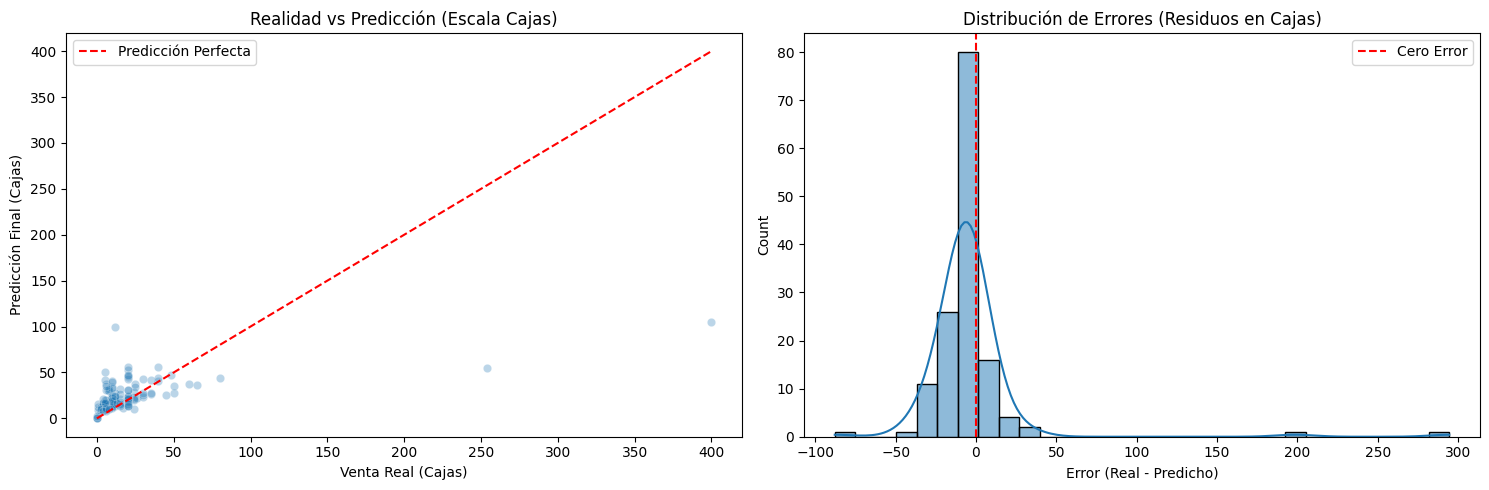

In [ ]:
print("\n--- 🕵️‍♂️ Iniciando Auditoría del Modelo (Escala Real en Cajas) ---")

# 1. Generar Predicciones Finales
final_predictions = final_calibrated_model.transform(test_data)

# Definimos las columnas a comparar (Cajas Reales vs Cajas Predichas)
col_real = "Venta_Cajas"       # <--- CAMBIO CLAVE: Ahora evaluamos Cajas
col_pred = "prediction_final"  # <--- Predicción calibrada en Cajas

# [1] MÉTRICAS
print("\n[1] MÉTRICAS DE ERROR Y NEGOCIO")
evaluator_rmse = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="r2")

rmse = evaluator_rmse.evaluate(final_predictions)
mae = evaluator_mae.evaluate(final_predictions)
r2 = evaluator_r2.evaluate(final_predictions)

# MAPE (usando F.abs)
mape_df = final_predictions.withColumn("APE", F.abs((F.col(col_real) - F.col(col_pred)) / (F.col(col_real) + 1)))
mape_score = mape_df.select(F.avg("APE")).collect()[0][0] * 100

print(f"  > RMSE: {rmse:.2f}")
print(f"  > MAE:  {mae:.2f} (Error promedio en CAJAS)")
print(f"  > R²:   {r2:.2%} (Varianza explicada)")

# [2] RESIDUOS
print("\n[2] ANÁLISIS DE RESIDUOS")
df_residuals = final_predictions.withColumn("Residual", F.col(col_real) - F.col(col_pred))
res_stats = df_residuals.select(F.avg("Residual").alias("Mean_Residual")).collect()[0]
mean_res = res_stats['Mean_Residual']

print(f"  > Promedio del Residuo: {mean_res:.4f} Cajas")
if abs(mean_res) > 1: # Tolerancia: 1 Caja de sesgo
    print("    ⚠️ ALERTA: Sesgo significativo (mayor a 1 caja promedio).")
else:
    print("    ✅ Residuo aceptable. Modelo balanceado.")

# [3] IMPORTANCIA DE VARIABLES
print("\n[3] IMPORTANCIA DE VARIABLES")
# Recuperamos el modelo RF (antepenúltimo stage)
rf_model = best_model.stages[-2] 

try:
    features_meta = final_predictions.schema["features"].metadata["ml_attr"]
    all_attrs = []
    if "attrs" in features_meta:
        for attr_type in ["numeric", "nominal", "binary"]:
            if attr_type in features_meta["attrs"]:
                all_attrs.extend(features_meta["attrs"][attr_type])
    
    attrs = sorted((attr["idx"], attr["name"]) for attr in all_attrs)
    feature_names = [name for idx, name in attrs]
    importances = rf_model.featureImportances.toArray()

    feat_imp_pd = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)
    for index, row in feat_imp_pd.iterrows():
        print(f"    - {row['Feature']}: {row['Importance']:.4f}")
except Exception as e:
    print(f"No se pudo extraer features: {e}")

# [4] GRÁFICOS
print("\n[4] GRÁFICOS")

# Muestra para Pandas
sample_pd = df_residuals.select(col_real, col_pred, "Residual") \
                        .sample(fraction=0.2, seed=42) \
                        .limit(5000) \
                        .toPandas()

plt.figure(figsize=(15, 5))

# --- Gráfico A: Real vs Predicción ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=col_real, y=col_pred, data=sample_pd, alpha=0.3)

val_max_real = sample_pd[col_real].max()
val_max_pred = sample_pd[col_pred].max()
max_v = builtins.max(val_max_real, val_max_pred) 

plt.plot([0, max_v], [0, max_v], 'r--', label='Predicción Perfecta')
plt.xlabel('Venta Real (Cajas)')
plt.ylabel('Predicción Final (Cajas)')
plt.title('Realidad vs Predicción (Escala Cajas)')
plt.legend()

# --- Gráfico B: Distribución de Errores ---
plt.subplot(1, 2, 2)

sns.histplot(sample_pd['Residual'], kde=True, bins=30)
plt.axvline(0, color='r', linestyle='--', label='Cero Error')
plt.title('Distribución de Errores (Residuos en Cajas)')
plt.xlabel('Error (Real - Predicho)')
plt.legend()

plt.tight_layout()
plt.show()

**1. R2 (R-Cuadrado): 37.24%**

De toda la variabilidad loca que tienen las ventas (suben, bajan, clientes nuevos, etc.), tu modelo es capaz de explicar y predecir el 37% de esos movimientos.

**2. MAE (Error Absoluto Medio): 16.25 unidades**

En promedio, la predicción falla por +/- 16 unidades.

**3. RMSE (Error Cuadrático Medio): 40.25**

Penaliza mucho los errores grandes e indica que, aunque el promedio es bueno, todavía hay algunas ventas "atípicas" o sorpresivas que el modelo no logra adivinar bien.

**4. Residuo Promedio: -0.6205**

Significa que el modelo es neutral, al estar cerca de cero.

## 8. PRUEBA

In [32]:
def recomendar_productos(nombre_cliente_busqueda):
    print(f"--- 🔍 Generando recomendaciones para: {nombre_cliente_busqueda} ---")
    
    # 1. Obtener datos del cliente
    info_cliente = df_full.filter(col("Cliente") == nombre_cliente_busqueda).select("Region", "Nombre_Zona").limit(1).collect()
    
    if not info_cliente:
        print("❌ Error: Cliente no encontrado en la base de datos.")
        return

    region_cliente = info_cliente[0]["Region"]
    zona_cliente = info_cliente[0]["Nombre_Zona"]
    mes_actual = "OCT" 
    mes_num = 10
    
    print(f"   > Contexto: Zona {zona_cliente} ({region_cliente}) - Mes: {mes_actual}")

    # 2. Obtener CATÁLOGO DE PRODUCTOS
    # Usamos los nuevos nombres de columnas: Precio_Caja, Venta_PY_Zona_Cajas
    catalogo_productos = df_full.select("Producto", "Precio_Caja", "ID_Articulo", 
                                      "Venta_PY_Zona_Cajas", "Venta_PY_Familia_Cajas",
                                      "Meta_Zona_Cajas", "Precio_Promedio_PY_Caja") \
                              .dropDuplicates(["Producto"]) \
                              .orderBy(desc("Venta_PY_Zona_Cajas")) \
                              .limit(50) 
    
    # 3. Construir el DataFrame de Simulación
    df_simulacion = catalogo_productos.withColumn("Cliente", lit(nombre_cliente_busqueda)) \
                                      .withColumn("Region", lit(region_cliente)) \
                                      .withColumn("Nombre_Zona", lit(zona_cliente)) \
                                      .withColumn("Mes", lit(mes_actual)) \
                                      .withColumn("Mes_Num", lit(mes_num))

    # 4. Ejecutar el Modelo CALIBRADO
    predicciones = final_calibrated_model.transform(df_simulacion)
    
    # 5. Mostrar Top 5 Recomendaciones
    print("\n--- 💡 TOP 5 PRODUCTOS RECOMENDADOS ---")
    
    # Mostramos Cajas y Piezas para que sea claro
    top_recs = predicciones.select("Producto", "Precio_Caja", "prediction_final", "prediction_piezas") \
                           .orderBy(desc("prediction_final")) \
                           .limit(5)
    
    top_recs.show(truncate=False)
    
    # Extra: Análisis de Elasticidad
    if top_recs.count() > 0:
        row_top = top_recs.collect()[0]
        mejor_producto = row_top["Producto"]
        precio_actual = row_top["Precio_Caja"]
        pred_actual_cajas = row_top["prediction_final"]
        
        print(f"\n--- 🧪 Análisis de Escenario para '{mejor_producto}' ---")
        print(f"   Precio Caja Actual: {precio_actual:.2f} -> Demanda: {pred_actual_cajas:.2f} Cajas")
        
        # Simulamos descuento del 10%
        precio_nuevo = precio_actual * 0.90
        
        df_escenario = df_simulacion.filter(col("Producto") == mejor_producto) \
                                    .withColumn("Precio_Caja", lit(precio_nuevo))
        
        res_escenario = final_calibrated_model.transform(df_escenario).select("prediction_final").collect()
        if res_escenario:
            pred_escenario_cajas = res_escenario[0][0]
            cambio = ((pred_escenario_cajas - pred_actual_cajas) / pred_actual_cajas) * 100
            
            print(f"   Precio -10% ({precio_nuevo:.2f})  -> Demanda: {pred_escenario_cajas:.2f} Cajas")
            print(f"   Impacto estimado: {cambio:+.2f}% en volumen.")
            
            if cambio > 0 and cambio < 1:
                print("   > Conclusión: Demanda Inelástica. Bajar precio no mueve la aguja.")
            elif cambio >= 1:
                print("   > Conclusión: Demanda Elástica. El descuento funciona.")
            else:
                print("   > Conclusión: Comportamiento atípico.")

# --- EJECUTAR PRUEBA ---
cliente_prueba = "ADMINISTRADORA CLINICA TRESA S.A" 
recomendar_productos(cliente_prueba)

--- 🔍 Generando recomendaciones para: ADMINISTRADORA CLINICA TRESA S.A ---
   > Contexto: Zona CHICLAYO (NORTE) - Mes: OCT

--- 💡 TOP 5 PRODUCTOS RECOMENDADOS ---
+-------------------------------------------------+-----------+------------------+------------------+
|Producto                                         |Precio_Caja|prediction_final  |prediction_piezas |
+-------------------------------------------------+-----------+------------------+------------------+
|LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML|56.81      |26.223584316159172|524.4716863231835 |
|TRAZIDEX UNGENA 3.5 G                            |46.76      |24.296468919122578|485.92937838245155|
|ELIPTIC OFTENO 5ML PF PERU                       |33.97      |19.18221702333491 |383.6443404666982 |
|GAAP OFTENO LIBRE DE CONSER PF 3 ML PERU         |79.34      |17.476700211832163|349.5340042366433 |
|AGGLAD OFTENO 5 ML                               |34.25      |17.25902853495443 |345.18057069908866|
+--------------------

--- 🔍 Analizando Oportunidades para: ADMINISTRADORA CLINICA TRESA S.A ---

📍 Ubicación: CHICLAYO (NORTE)
💡 TOP 3 PRODUCTOS RECOMENDADOS (Volumen Estimado):
   - LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML: 26.2 Cajas (524 Unids) a S/.56.81
   - TRAZIDEX UNGENA 3.5 G: 24.3 Cajas (486 Unids) a S/.46.76
   - ELIPTIC OFTENO 5ML PF PERU: 19.2 Cajas (384 Unids) a S/.33.97

🧪 ANÁLISIS DE ELASTICIDAD AUTOMÁTICO: LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML
⏳ Simulando escenarios de precio... ¡Listo!

🏆 ESTRATEGIA RECOMENDADA:
   ⬆️  SUBIR PRECIO un 30% (a S/. 73.85).
       -> La demanda bajará un poco, pero ganarás +26.5% más dinero.


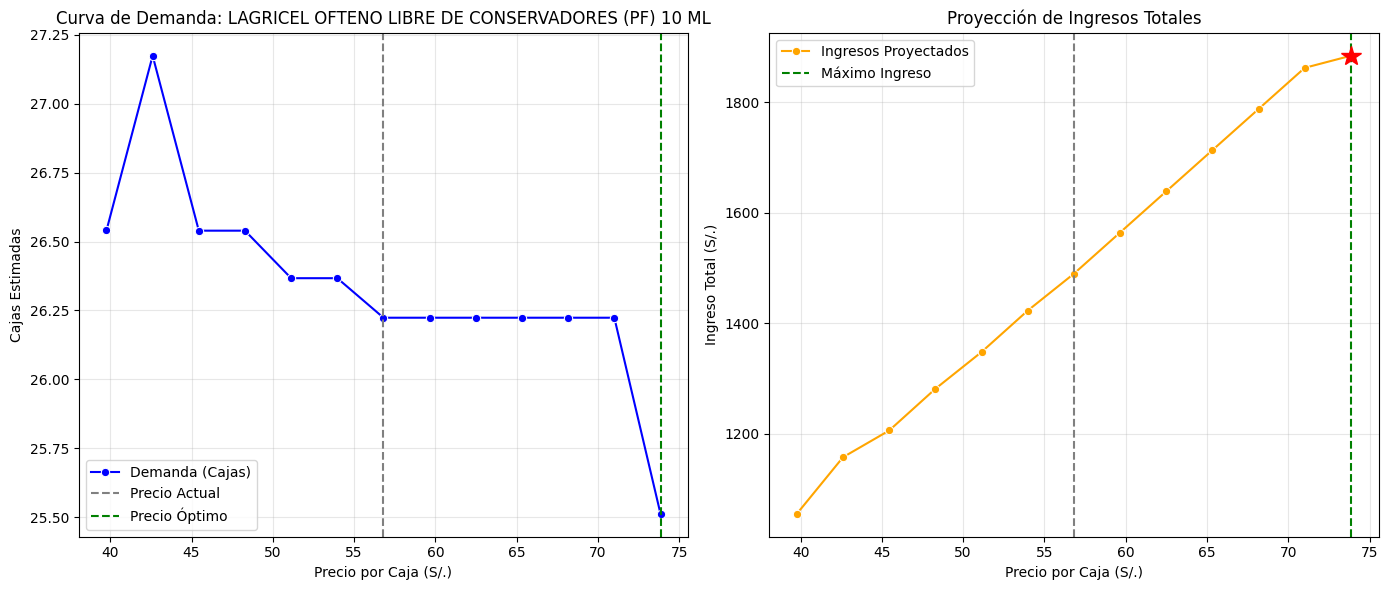

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql.functions import lit, col, desc

# ==============================================================================
# 9. ANALIZADOR DE ESTRATEGIA DE PRECIOS (CORREGIDO)
# ==============================================================================

def analizar_cliente_y_precios(nombre_cliente_busqueda, mes_analisis="OCT"):
    print(f"--- 🔍 Analizando Oportunidades para: {nombre_cliente_busqueda} ---")
    
    # 1. Contexto del Cliente
    info = df_full.filter(col("Cliente") == nombre_cliente_busqueda).select("Region", "Nombre_Zona").limit(1).collect()
    if not info:
        print("❌ Cliente no encontrado.")
        return
    region, zona = info[0]["Region"], info[0]["Nombre_Zona"]
    
    # 2. Catálogo Top 50
    catalogo = df_full.select(
        "Producto", 
        "Precio_Caja", 
        "ID_Articulo", 
        "Venta_PY_Zona_Cajas", 
        "Meta_Zona_Cajas", 
        "Precio_Promedio_PY_Caja",
        "Venta_PY_Familia_Cajas"
    ).dropDuplicates(["Producto"]) \
     .orderBy(desc("Venta_PY_Zona_Cajas")) \
     .limit(50)
    
    # 3. Simulación Base
    df_sim = catalogo.withColumn("Cliente", lit(nombre_cliente_busqueda)) \
                     .withColumn("Region", lit(region)) \
                     .withColumn("Nombre_Zona", lit(zona)) \
                     .withColumn("Mes", lit(mes_analisis)) \
                     .withColumn("Mes_Num", lit(10))
    
    # Predicción Base
    preds = final_calibrated_model.transform(df_sim)
    
    # 4. Mostrar Top 3 Recomendaciones
    # Usamos prediction_final (Cajas) y prediction_piezas (Unidades)
    top_recs = preds.select("Producto", "Precio_Caja", "prediction_final", "prediction_piezas") \
                    .orderBy(desc("prediction_final")) \
                    .limit(3) \
                    .collect()
    
    print(f"\n📍 Ubicación: {zona} ({region})")
    print("💡 TOP 3 PRODUCTOS RECOMENDADOS (Volumen Estimado):")
    for row in top_recs:
        print(f"   - {row['Producto']}: {row['prediction_final']:.1f} Cajas ({row['prediction_piezas']:.0f} Unids) a S/.{row['Precio_Caja']:.2f}")

    # ==========================================================================
    # 5. MOTOR DE SIMULACIÓN MASIVA (CURVA DE ELASTICIDAD)
    # ==========================================================================
    if not top_recs:
        print("⚠️ No se generaron recomendaciones suficientes.")
        return

    # Tomamos el producto #1 para hacer el análisis profundo
    mejor_prod = top_recs[0]["Producto"]
    precio_base = top_recs[0]["Precio_Caja"]
    
    print("\n" + "="*80)
    print(f"🧪 ANÁLISIS DE ELASTICIDAD AUTOMÁTICO: {mejor_prod}")
    print("="*80)
    
    # Generamos escenarios: De -30% a +30% en pasos de 5%
    rango_ajustes = np.arange(-0.30, 0.35, 0.05) 
    resultados_sim = []
    
    print("⏳ Simulando escenarios de precio...", end="")
    
    for ajuste in rango_ajustes:
        nuevo_precio = precio_base * (1 + ajuste)
        
        # Creamos dataframe de escenario para el modelo
        df_escenario = df_sim.filter(col("Producto") == mejor_prod) \
                             .withColumn("Precio_Caja", lit(nuevo_precio))
        
        # Predecimos (Cajas)
        res = final_calibrated_model.transform(df_escenario).select("prediction_final").collect()
        demanda_est_cajas = res[0]["prediction_final"] if res else 0
        
        # Ingreso = Precio Caja * Cantidad Cajas
        ingreso_est = nuevo_precio * demanda_est_cajas
        
        resultados_sim.append({
            "Ajuste": ajuste * 100,
            "Precio": nuevo_precio,
            "Demanda_Cajas": demanda_est_cajas,
            "Ingreso_Total": ingreso_est
        })
    print(" ¡Listo!\n")
    
    # Convertimos a Pandas
    df_resultados = pd.DataFrame(resultados_sim)
    
    # 6. Encontrar el Precio Óptimo
    idx_optimo = df_resultados["Ingreso_Total"].idxmax()
    escenario_optimo = df_resultados.iloc[idx_optimo]
    
    # Buscamos el escenario base (Ajuste ~ 0%) para comparar
    base_row = df_resultados.iloc[(df_resultados['Ajuste'].abs()).argsort()[:1]]
    ingreso_actual = base_row["Ingreso_Total"].values[0]
    
    mejora = ((escenario_optimo['Ingreso_Total'] - ingreso_actual) / ingreso_actual) * 100
    
    print(f"🏆 ESTRATEGIA RECOMENDADA:")
    if abs(escenario_optimo['Ajuste']) < 1:
        print(f"   ✅ MANTENER PRECIO ACTUAL (S/. {precio_base:.2f}). Es el punto óptimo de rentabilidad.")
    elif escenario_optimo['Ajuste'] < 0:
        print(f"   ⬇️  BAJAR PRECIO un {abs(escenario_optimo['Ajuste']):.0f}% (a S/. {escenario_optimo['Precio']:.2f}).")
        print(f"       -> La demanda subirá a {escenario_optimo['Demanda_Cajas']:.1f} Cajas.")
        print(f"       -> Tus ingresos subirán un +{mejora:.1f}%.")
    else:
        print(f"   ⬆️  SUBIR PRECIO un {escenario_optimo['Ajuste']:.0f}% (a S/. {escenario_optimo['Precio']:.2f}).")
        print(f"       -> La demanda bajará un poco, pero ganarás +{mejora:.1f}% más dinero.")

    # 7. Visualización Gráfica
    plt.figure(figsize=(14, 6))
    
    # Gráfico 1: Curva de Demanda
    plt.subplot(1, 2, 1)
    sns.lineplot(x="Precio", y="Demanda_Cajas", data=df_resultados, marker="o", color="blue", label="Demanda (Cajas)")
    plt.axvline(precio_base, color="grey", linestyle="--", label="Precio Actual")
    plt.axvline(escenario_optimo['Precio'], color="green", linestyle="--", label="Precio Óptimo")
    plt.title(f"Curva de Demanda: {mejor_prod}")
    plt.xlabel("Precio por Caja (S/.)")
    plt.ylabel("Cajas Estimadas")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Gráfico 2: Curva de Ingresos
    plt.subplot(1, 2, 2)
    sns.lineplot(x="Precio", y="Ingreso_Total", data=df_resultados, marker="o", color="orange", label="Ingresos Proyectados")
    plt.axvline(precio_base, color="grey", linestyle="--")
    plt.axvline(escenario_optimo['Precio'], color="green", linestyle="--", label="Máximo Ingreso")
    plt.plot(escenario_optimo['Precio'], escenario_optimo['Ingreso_Total'], 'r*', markersize=15)
    
    plt.title("Proyección de Ingresos Totales")
    plt.xlabel("Precio por Caja (S/.)")
    plt.ylabel("Ingreso Total (S/.)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ==============================================================================
# EJECUCIÓN
# ==============================================================================
cliente_prueba = "ADMINISTRADORA CLINICA TRESA S.A" 
analizar_cliente_y_precios(cliente_prueba)